In [15]:
import numpy as np
import matplotlib.pyplot as plt

from tests import *
%matplotlib inline

In [11]:
run_test('loop', repeat=6)

Building...
Running test loop for 6 times... Duration: 0.682s


[0.975634, 0.882334, 1.075745, 0.881607, 0.919391, 0.906037]

In [145]:
sorted(get_all_tests())

[u'call0',
 u'call1',
 u'call2',
 u'call3',
 u'call4',
 u'call5',
 u'call6',
 u'call7',
 u'create_process',
 u'create_thread',
 u'getpid',
 u'getppid',
 u'getuid',
 u'loop',
 u'mem_bandwidth_memcpy',
 u'mem_bandwidth_memset',
 u'mem_bandwidth_r',
 u'mem_bandwidth_rw',
 u'mem_bandwidth_w',
 u'mem_latency_128k',
 u'mem_latency_128m',
 u'mem_latency_16k',
 u'mem_latency_16m',
 u'mem_latency_1k',
 u'mem_latency_1m',
 u'mem_latency_256k',
 u'mem_latency_2k',
 u'mem_latency_2m',
 u'mem_latency_32k',
 u'mem_latency_32m',
 u'mem_latency_4k',
 u'mem_latency_4m',
 u'mem_latency_512k',
 u'mem_latency_64k',
 u'mem_latency_64m',
 u'mem_latency_8k',
 u'mem_latency_8m',
 u'mem_pagefault',
 u'nanosleep',
 u'rdtsc',
 u'switch_process',
 u'switch_thread']

In [148]:
run_tests('switch_process', 'switch_thread')

Running test switch_process for 10 times... Duration: 1.876s
Running test switch_thread for 10 times... Duration: 1.573s


{'switch_process': [17439.0496,
  15529.1968,
  15094.3316,
  14993.8296,
  24021.1664,
  14110.9686,
  15846.2336,
  13632.5838,
  16043.587,
  16313.5664],
 'switch_thread': [14225.3306,
  14528.4934,
  13549.5506,
  12566.9082,
  13298.9428,
  12866.7096,
  13099.3726,
  12107.0312,
  11599.7584,
  13189.1432]}

In [147]:
run_tests('switch_process', 'switch_thread')

Running test switch_process for 10 times... Duration: 1.348s
Running test switch_thread for 10 times... Duration: 1.035s


{'switch_process': [11771.3596,
  15876.8322,
  9066.3418,
  35321.9018,
  8519.5402,
  8444.7824,
  8324.239,
  8217.0782,
  10013.7352,
  10355.0992],
 'switch_thread': [10871.1492,
  5805.7502,
  8585.1482,
  7990.077,
  7934.9152,
  8219.8274,
  8333.05,
  8293.1254,
  8177.9902,
  8640.4226]}

In [6]:
def plot_results(tests, res, violin=True, ticks=None):
    res = [res[t] for t in tests]
    x = range(1, len(tests) + 1)
    y = [np.median(r) for r in res]
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, 'o-')
    if violin:
        plt.violinplot(res)
    plt.ylim(ymin=0)
    if ticks is None:
        ticks = tests
    plt.xticks(x, ticks)

In [43]:
call_tests = ['call0', 'call1', 'call2', 'call3', 'call4', 'call5', 'call6', 'call7']
call_res = run_tests(*call_tests)

Running test call0 for 10 times...
Running test call1 for 10 times...
Running test call2 for 10 times...
Running test call3 for 10 times...
Running test call4 for 10 times...
Running test call5 for 10 times...
Running test call6 for 10 times...
Running test call7 for 10 times...


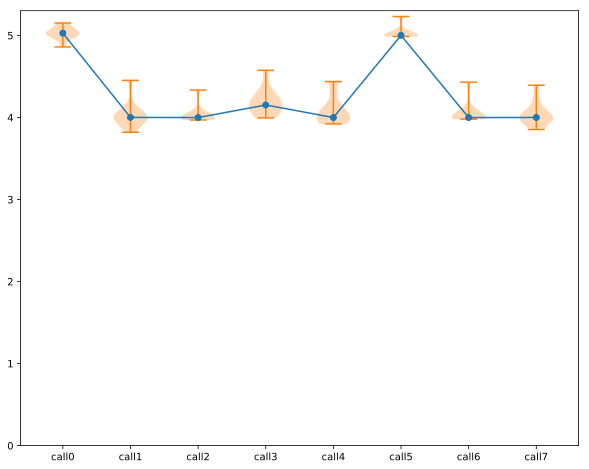

In [44]:
plot_results(call_tests, call_res)

In [25]:
short_name = '1k 2k 4k 8k 16k 32k 64k 128k 256k 512k 1m 2m 4m 8m 16m 32m 64m 128m'.split()
tests = ['mem_latency_' + t for t in short_name]
res = run_tests(*tests, repeat=10)
res = { k[12:]: v for k, v in res.items() }

Building...
Running test mem_latency_1k for 10 times... Duration: 1.994s
Running test mem_latency_2k for 10 times... Duration: 1.976s
Running test mem_latency_4k for 10 times... Duration: 1.962s
Running test mem_latency_8k for 10 times... Duration: 1.968s
Running test mem_latency_16k for 10 times... Duration: 1.038s
Running test mem_latency_32k for 10 times... Duration: 1.028s
Running test mem_latency_64k for 10 times... Duration: 1.503s
Running test mem_latency_128k for 10 times... Duration: 1.500s
Running test mem_latency_256k for 10 times... Duration: 1.496s
Running test mem_latency_512k for 10 times... Duration: 2.218s
Running test mem_latency_1m for 10 times... Duration: 2.231s
Running test mem_latency_2m for 10 times... Duration: 2.250s
Running test mem_latency_4m for 10 times... Duration: 2.797s
Running test mem_latency_8m for 10 times... Duration: 4.069s
Running test mem_latency_16m for 10 times... Duration: 5.763s
Running test mem_latency_32m for 10 times... Duration: 3.719s
R

In [28]:
res['16m'] = run_test('mem_latency_16m')

Running test mem_latency_16m for 10 times... Duration: 5.918s


In [32]:
print str(res)

{'8k': [4.024834, 4.0812, 4.002018, 4.083852, 3.987566, 4.001593, 4.010643, 4.101335, 4.036702, 4.17659], '8m': [177.762379, 185.030809, 190.175223, 180.807967, 181.038974, 164.544639, 186.733207, 167.711807, 191.327661, 201.004725], '512k': [44.75164, 46.291455, 45.924867, 47.111539, 45.861966, 44.627902, 46.425165, 46.728038, 46.193512, 46.255277], '32k': [4.012983, 3.989146, 4.013968, 3.997657, 4.004675, 3.889794, 3.862342, 3.963703, 3.999875, 3.993861], '64k': [11.854213, 12.344366, 12.01834, 12.285375, 11.752917, 12.035994, 12.012754, 11.851809, 11.908975, 12.460326], '16k': [4.008439, 4.105368, 4.075939, 3.987651, 4.252475, 3.997365, 4.141047, 3.90305, 4.000342, 3.993537], '64m': [345.804536, 333.719272, 332.352244, 323.422594, 334.19578, 335.866688, 351.164948, 336.094384, 349.582638, 326.431054], '16m': [302.30263, 252.811942, 256.226356, 230.202157, 257.428033, 245.697171, 245.937331, 241.725356, 239.394865, 247.052319], '32m': [265.010036, 290.405518, 284.271762, 292.555402, 

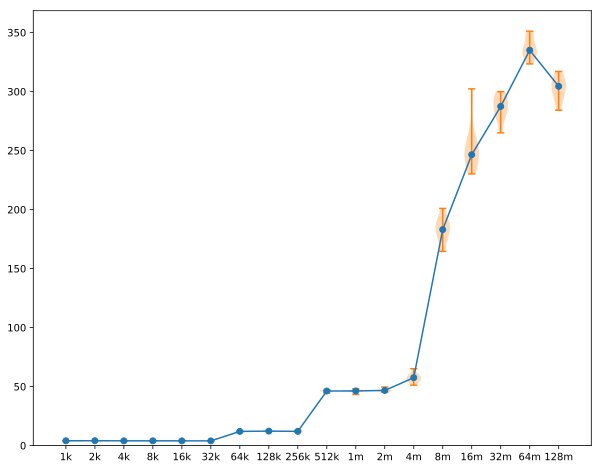

In [29]:
plot_results(short_name, res, violin=True)
plt.show()

In [66]:
run_test('loop')

Running test loop for 10 times... Duration: 1.263s


[1.011991,
 0.997956,
 1.008042,
 0.999676,
 0.999908,
 1.025867,
 1.000044,
 0.999673,
 0.999668,
 0.973336]

Building...
Running test mem_bandwidth_memcpy for 10 times... Duration: 3.671s


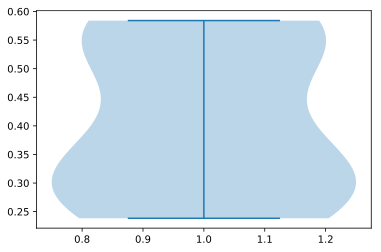

[0.560989,
 0.553963,
 0.407432,
 0.238412,
 0.555662,
 0.302162,
 0.584081,
 0.292494,
 0.294033,
 0.30261]

In [54]:
res = run_test('mem_bandwidth_memcpy')
plt.violinplot(res)
plt.show()
res

In [55]:
2.592 / np.median(res)

7.3009765619498559

In [ ]:
res = {
    t: [2.592 / r for r in run_test(t)]
    for t in ['mem_bandwidth_memset', 'mem_bandwidth_memcpy', 'mem_bandwidth_r', 'mem_bandwidth_w', 'mem_bandwidth_rw']
}

Building...
Running test mem_bandwidth_memset for 10 times... Duration: 4.141s
Running test mem_bandwidth_memcpy for 10 times... Duration: 8.931s
Running test mem_bandwidth_r for 10 times...

In [114]:
t = 'mem_bandwidth_memset'
res[t] = [2.592 / r for r in run_test(t)]

Running test mem_bandwidth_memset for 10 times... Duration: 1.237s


In [118]:
print str(res)

{'mem_bandwidth_r': [10.31305205863161, 11.24277807658275, 11.648600550072805, 11.074651353568498, 11.062126301144197, 10.533502389544523, 10.391526415805384, 10.520846863228991, 11.057643083853794, 10.839156452685325], 'mem_bandwidth_memcpy': [11.34920704421462, 7.835929186417722, 9.684578653574551, 8.514692114383326, 8.281388282730173, 10.14477438444468, 8.606091997529733, 7.844395282467837, 9.851655055244525, 8.467157099737362], 'mem_bandwidth_w': [12.832953757797803, 10.919385279050957, 10.383866548085475, 10.985704174313287, 11.555642738045348, 10.648218518533735, 11.131056162018705, 12.046680888442717, 11.895856184973221, 11.74652521288311], 'mem_bandwidth_memset': [19.48095871569976, 17.59256117012251, 23.719321363860978, 23.33453366942744, 18.06183670482973, 23.455739959821187, 20.436321777455394, 22.845055526176626, 20.92381213774843, 24.009114571272427], 'mem_bandwidth_rw': [7.037702754804481, 7.913730566784315, 7.9309469097763, 8.565027459636648, 8.598612014171787, 8.6522284

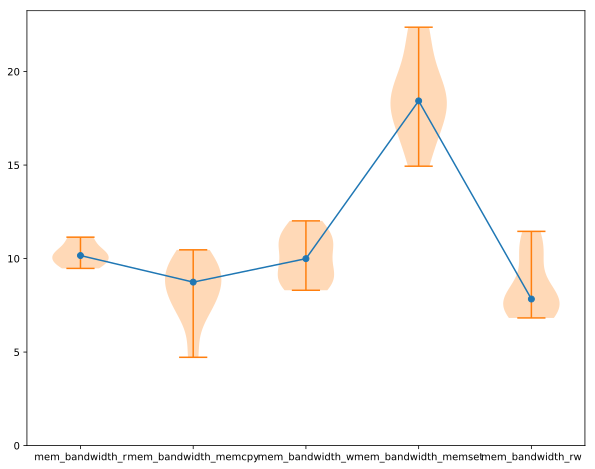

In [120]:
plot_results(res.keys(), res)
plt.show()

In [128]:
run_test('mem_pagefault', repeat=10)

Running test mem_pagefault for 10 times... Duration: 3.293s


[5132.627686,
 3252.84314,
 5131.808533,
 5489.561401,
 6136.565125,
 3588.163879,
 5210.129578,
 5276.19519,
 5257.848511,
 4474.83374]

In [23]:
run_test('tcp_rtt')

Running test tcp_rtt for 10 times... Duration: 1.029s


[60688.128,
 59995.518,
 59117.63,
 56236.786,
 63463.488,
 65473.424,
 63717.002,
 57820.732,
 61040.468,
 58033.828]

In [20]:
run_test('tcp_bandwidth_64m')

Building...
Running test tcp_bandwidth_64m for 10 times... Duration: 2.028s


[21291996.0,
 23844605.5,
 25212327.0,
 24026660.0,
 23543751.0,
 23617880.0,
 20033873.5,
 24765471.0,
 19066187.5,
 19882426.0]

In [5]:
run_test('tcp_overhead')

Running test tcp_overhead for 10 times... Duration: 0.080s


[548084.0,
 489462.0,
 404180.0,
 359048.0,
 334348.0,
 349628.0,
 361928.0,
 334578.0,
 336616.0,
 372060.0]

In [37]:
short_name = '64m 128m 256m 512m 1g 2g 4g 8g 16g'.split()
tests = ['fs_local_seq_' + t for t in short_name]
res = run_tests(*tests)

Running test fs_local_seq_64m for 10 times... Duration: 0.378s
Running test fs_local_seq_128m for 10 times... Duration: 0.664s
Running test fs_local_seq_256m for 10 times... Duration: 1.164s
Running test fs_local_seq_512m for 10 times... Duration: 2.442s
Running test fs_local_seq_1g for 10 times... Duration: 4.451s
Running test fs_local_seq_2g for 10 times... Duration: 6.163s
Running test fs_local_seq_4g for 10 times... Duration: 16.142s
Running test fs_local_seq_8g for 10 times... Duration: 149.662s
Building...
Running test fs_local_seq_16g for 10 times... Duration: 667.559s


In [40]:
run_test('fs_local_seq_8g', repeat=1)

Running test fs_local_seq_8g for 1 times... Duration: 47.842s


[59116.134269]

In [52]:
run_test('fs_local_seq_64m', repeat=10)

Building...
Running test fs_local_seq_64m for 10 times... Duration: 3.806s


[58652.702393,
 59782.558472,
 58482.642944,
 61614.743774,
 58438.616333,
 59615.351807,
 57217.78833,
 61197.579224,
 57423.875488,
 56932.149292]

In [58]:
run_test('fs_local_rand_64m', repeat=10)

Running test fs_local_rand_64m for 10 times... Duration: 14.346s


[223836.047607,
 221479.222046,
 223041.852051,
 232182.545776,
 226331.063721,
 232186.04248,
 230326.380615,
 222433.780884,
 224723.536621,
 219816.639404]

In [60]:
run_test('fs_cache_rand_64m', repeat=10)

Building...


In file included from ../src/main.c:9:
In file included from ../src/test.h:17:
../src/fs/local.h:11:112: warning: format specifies type 'int' but the argument has type 'uint64_t' (aka 'unsigned long long') [-Wformat]
    __builtin___sprintf_chk (filename, 0, __builtin_object_size (filename, 2 > 1 ? 1 : 0), "/tmp/bigfile-%dm", size >> 20);
                                                                                                         ~~    ^~~~~~~~~~
                                                                                                         %llu
In file included from ../src/main.c:9:
In file included from ../src/test.h:18:
../src/fs/cache.h:30:6: error: redefinition of 'fs_local_rand'
void fs_local_rand(uint64_t size) {
     ^
../src/fs/local.h:48:6: note: previous definition is here
void fs_local_rand(uint64_t size) {
     ^
In file included from ../src/main.c:9:
In file included from ../src/test.h:18:
../src/fs/cache.h:45:6: error: redefinition of 'test_fs_local_

Exception: clang exits non-zero!

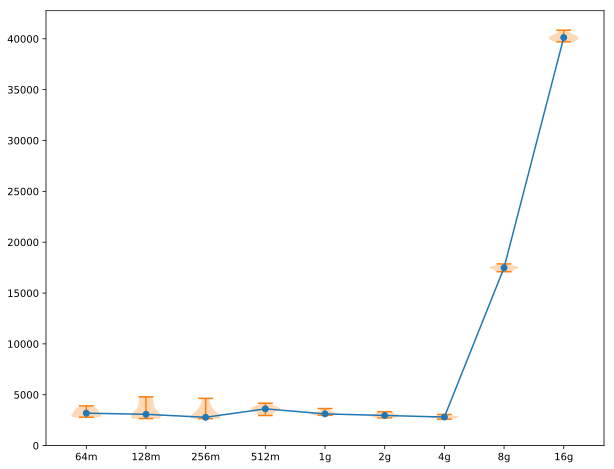

In [38]:
plot_results(tests, res, ticks=short_name)